***Import Necessary Libraries***

In [914]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
#!pip install researchpy
import researchpy as rp
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import model_selection 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

***Loading Dataset***

In [423]:
expenses = pd.read_csv("expenses.csv")
df = expenses.copy()

# Structure and nature of data

In [424]:
df.head() #First 5 observations of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [425]:
df.tail()  #Last 5 observations of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [426]:
df.describe().T #Descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [428]:
df.dtypes #variable types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The gender variable is in the object type. I will change it to Category type with pandas library:

In [429]:
df.sex = pd.Categorical(df.sex) 

In [430]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker        object
region        object
charges      float64
dtype: object

In [431]:
df.smoker = pd.Categorical(df.smoker) 

In [432]:
df.region = pd.Categorical(df.region) 

In [433]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [434]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Are there any missing values in the data set?

In [771]:
df.isnull().values.any()

False

There are no missing values in the dataset

**Only Categorical Variables and Summaries**

In [436]:
kat_df = df.select_dtypes(include = ["category"])

In [437]:
kat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [438]:
kat_df.sex.unique() #Values of the categorical variable

['female', 'male']
Categories (2, object): ['female', 'male']

In [439]:
kat_df["sex"].value_counts().count()

2

In [440]:
kat_df.smoker.unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [441]:
kat_df["smoker"].value_counts().count()

2

In [442]:
kat_df.region.unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

In [443]:
kat_df["region"].value_counts().count()

4

How many rows and columns does the dataset consist of?

In [444]:
df.shape

(1338, 7)

Accessing the Frequencies of the Classes of a Categorical Variable

In [445]:
kat_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [446]:
kat_df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [447]:
kat_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**summaries of numeric variables**

In [448]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [449]:
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [450]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [451]:
df_num["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [452]:
df_num["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [453]:
df_num["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [454]:
df_num["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

**Catching Outliers**

In [455]:
df_age = df["age"]
df_bmi = df["bmi"]
df_children = df["children"]
df_charges = df["charges"]

I will check with the boxplot chart, but the boxplot chart does not give detailed information.

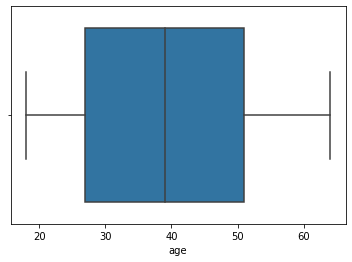

In [456]:
sns.boxplot(x = df_age)

There doesn't seem to be any outliers for the age variable

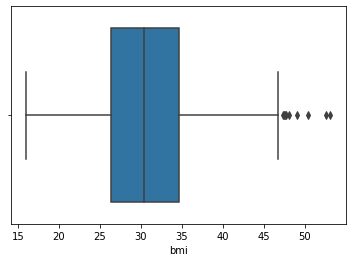

In [457]:
sns.boxplot(x = df_bmi)

There seem to be outliers for the BMI variable

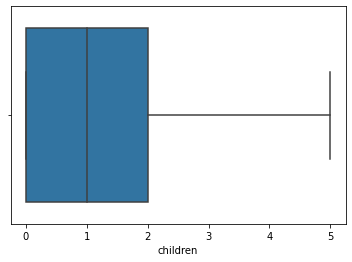

In [458]:
sns.boxplot(x = df_children)

There doesn't seem to be any outliers for the children variable

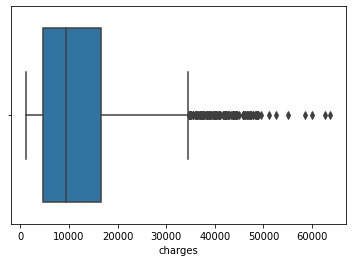

In [459]:
sns.boxplot(x = df_charges)

There seem to be outliers for the charges variable

Let's observe the outliers in more detail by applying statistical methods.

In [460]:
Q1_age = df_age.quantile(0.25) #will take the value corresponding to 25% of the variable when sorted from smallest to largest.
Q3_age = df_age.quantile(0.75) #will take the value corresponding to 75% of the variable when sorted from smallest to largest.
IQR_age = Q3_age-Q1_age

In [461]:
Q1_age

27.0

In [462]:
Q3_age

51.0

In [463]:
IQR_age

24.0

In [464]:
lower_bound_age = Q1_age- 1.5*IQR_age #Defining threshold values
upper_bound_age = Q3_age + 1.5*IQR_age

In [465]:
lower_bound_age

-9.0

In [466]:
upper_bound_age

87.0

In [467]:
(df_age < lower_bound_age).sum() | (df_age > upper_bound_age).sum()

0

It supports boxplot plot. Age variable has no outlier

In [468]:
Q1_bmi = df_bmi.quantile(0.25) 
Q3_bmi = df_bmi.quantile(0.75)
IQR_bmi = Q3_bmi-Q1_bmi

In [469]:
Q1_bmi

26.29625

In [470]:
Q3_bmi

34.69375

In [471]:
IQR_bmi

8.3975

In [472]:
lower_bound_bmi = Q1_bmi- 1.5*IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5*IQR_bmi

In [473]:
lower_bound_bmi

13.7

In [474]:
upper_bound_bmi

47.290000000000006

In [475]:
(df_bmi < lower_bound_bmi).sum() | (df_bmi > upper_bound_bmi).sum()

9

In [476]:
outlier_tf_bmi_l = (df_bmi < lower_bound_bmi)

In [477]:
outlier_tf_bmi_l.head()

0    False
1    False
2    False
3    False
4    False
Name: bmi, dtype: bool

In [478]:
df_bmi[outlier_tf_bmi_l]

Series([], Name: bmi, dtype: float64)

In [479]:
outlier_tf_bmi_u = (df_bmi > upper_bound_bmi)

In [480]:
outlier_tf_bmi_u.head()

0    False
1    False
2    False
3    False
4    False
Name: bmi, dtype: bool

In [481]:
df_bmi[outlier_tf_bmi_u]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [482]:
df_bmi[outlier_tf_bmi_u].index #indexes of observations with outliers.

Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

It supports boxplot. BMI variable has 9 outliers

In [483]:
Q1_children = df_children.quantile(0.25) 
Q3_children = df_children.quantile(0.75)
IQR_children = Q3_children-Q1_children

In [484]:
Q1_children

0.0

In [485]:
Q3_children

2.0

In [486]:
IQR_children

2.0

In [487]:
lower_bound_children = Q1_children- 1.5*IQR_children
upper_bound_children = Q3_children + 1.5*IQR_children

In [488]:
lower_bound_children

-3.0

In [489]:
upper_bound_children

5.0

In [490]:
(df_children < lower_bound_children).sum() | (df_children > upper_bound_children).sum()

0

It supports boxplot. Children variable has no outlier

In [491]:
Q1_charges = df_charges.quantile(0.25) 
Q3_charges = df_charges.quantile(0.75)
IQR_charges = Q3_charges-Q1_charges

In [492]:
Q1_charges

4740.28715

In [493]:
Q3_charges

16639.912515

In [494]:
IQR_charges

11899.625365

In [495]:
lower_bound_charges = Q1_charges- 1.5*IQR_charges
upper_bound_charges = Q3_charges + 1.5*IQR_charges

In [496]:
lower_bound_charges

-13109.1508975

In [497]:
upper_bound_charges

34489.350562499996

In [498]:
(df_charges < lower_bound_charges).sum() | (df_charges > upper_bound_charges).sum()

139

In [499]:
outlier_tf_charges_l = (df_charges < lower_bound_charges)

In [500]:
df_charges[outlier_tf_charges_l]

Series([], Name: charges, dtype: float64)

In [501]:
outlier_tf_charges_u = (df_charges > upper_bound_charges)

In [502]:
df_charges[outlier_tf_charges_u]

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

It supports boxplot. Charges variable has 139 outliers

# **Exploratory Data Analysis (EDA)**

In [503]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


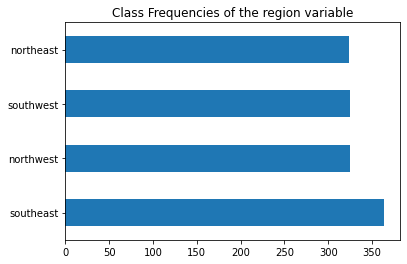

In [504]:
df["region"].value_counts().plot.barh().set_title("Class Frequencies of the region variable");

I observe that the class frequencies of the variable region are close to each other

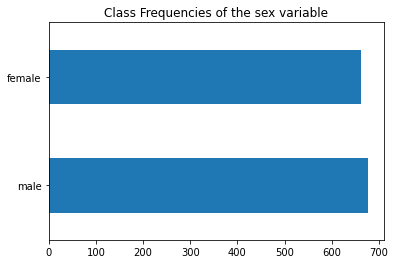

In [505]:
df["sex"].value_counts().plot.barh().set_title("Class Frequencies of the sex variable");

I observe that the class frequencies of the variable sex are close to each other





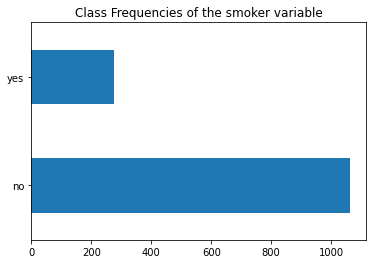

In [506]:
df["smoker"].value_counts().plot.barh().set_title("Class Frequencies of the smoker variable");

I observe that non-smokers are much more than smokers

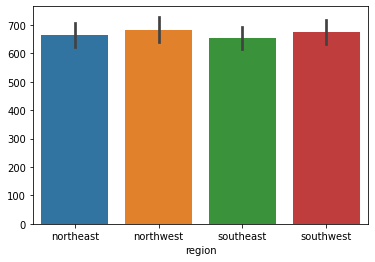

In [507]:
sns.barplot(x = "region", y = df.region.index, data= df);

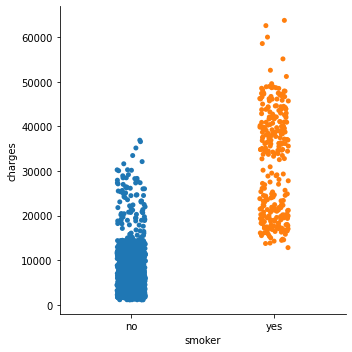

In [508]:
sns.catplot(x = "smoker", y = "charges", data = df);

Smokers expenditure much more than non-smokers.

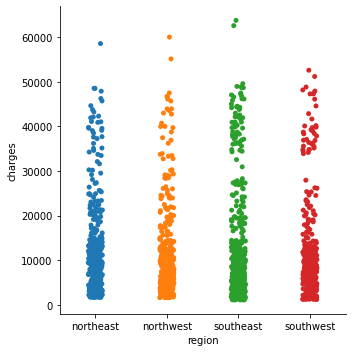

In [509]:
sns.catplot(x = "region", y = "charges", data = df);

The highest expenditure was seen in the southeast region, but overall there was not much difference between regions.

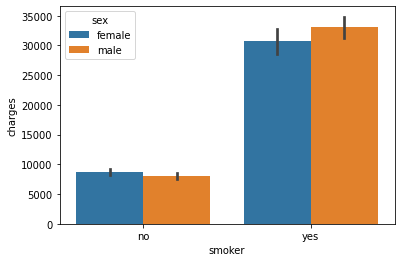

In [510]:
sns.barplot(x = "smoker", y = "charges", hue = "sex", data = df);

The highest expenditure is in men who smoke.

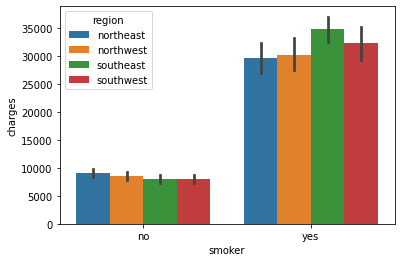

In [511]:
sns.barplot(x = "smoker", y = "charges", hue = "region", data = df);

The highest expenditure is in smokers and those living in the southeast region.

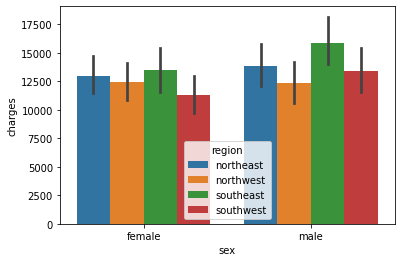

In [512]:
sns.barplot(x = "sex", y = "charges", hue = "region", data = df);

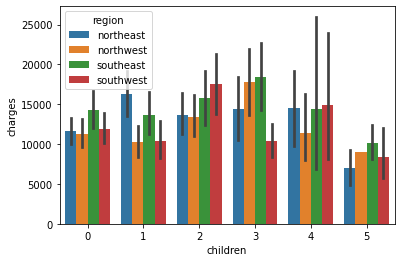

In [513]:
sns.barplot(x = "children", y = "charges", hue = "region", data = df);

Superficially, the highest expenditure from these graphs is seen among men who smokes and living in the southeast region.

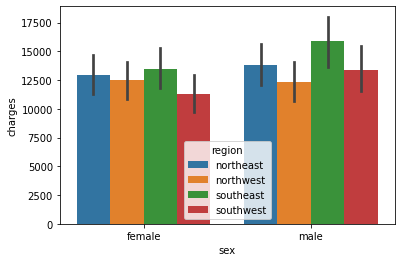

In [514]:
sns.barplot(x = "sex", y = "charges", hue = "region", data = df);

In [515]:
df.groupby(["smoker","sex"])["charges"].mean()

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [516]:
df.groupby(["smoker","region"])["charges"].mean()

smoker  region   
no      northeast     9165.531672
        northwest     8556.463715
        southeast     8032.216309
        southwest     8019.284513
yes     northeast    29673.536473
        northwest    30192.003182
        southeast    34844.996824
        southwest    32269.063494
Name: charges, dtype: float64

In [517]:
df.groupby(["sex","region"])["charges"].mean()

sex     region   
female  northeast    12953.203151
        northwest    12479.870397
        southeast    13499.669243
        southwest    11274.411264
male    northeast    13854.005374
        northwest    12354.119575
        southeast    15879.617173
        southwest    13412.883576
Name: charges, dtype: float64

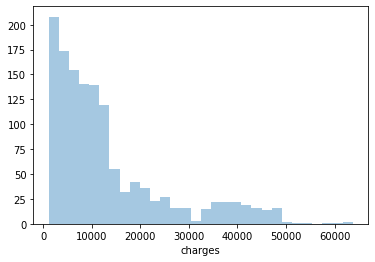

In [518]:
sns.distplot(df.charges, kde = False);

charges variable has right-skewed distribution

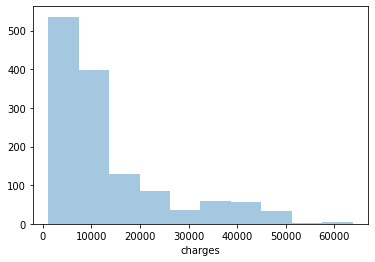

In [519]:
sns.distplot(df.charges, bins = 10, kde = False);

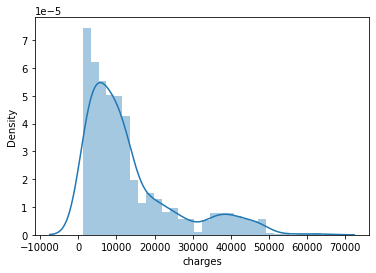

In [520]:
sns.distplot(df.charges);

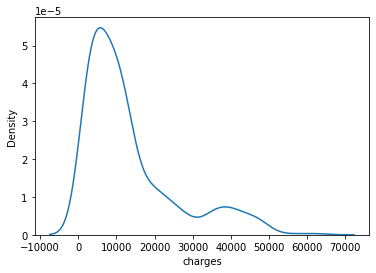

In [521]:
sns.distplot(df.charges, hist = False);

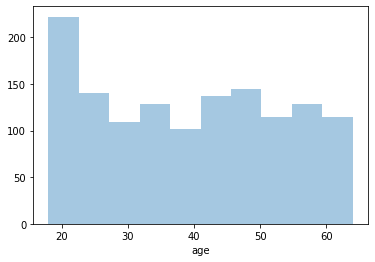

In [522]:
sns.distplot(df.age, bins = 10, kde = False);

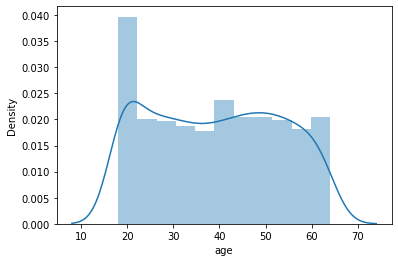

In [523]:
sns.distplot(df.age);

charges variable has right-skewed distribution

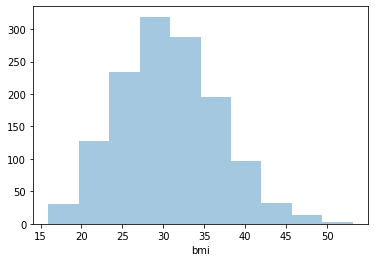

In [524]:
sns.distplot(df.bmi, bins = 10, kde = False);

bmi variable has right-skewed distribution. But there is not much disorder.close to normal distribution.

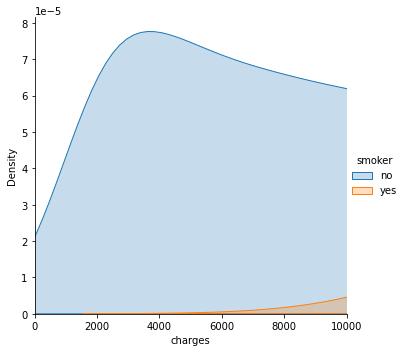

In [525]:
(sns
 .FacetGrid(df,
              hue = "smoker",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

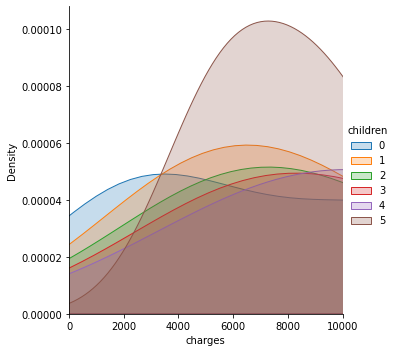

In [526]:
(sns
 .FacetGrid(df,
              hue = "children",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

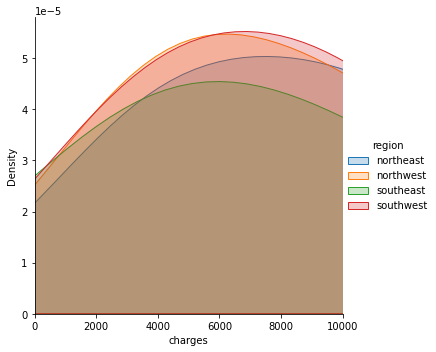

In [527]:
(sns
 .FacetGrid(df,
              hue = "region",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

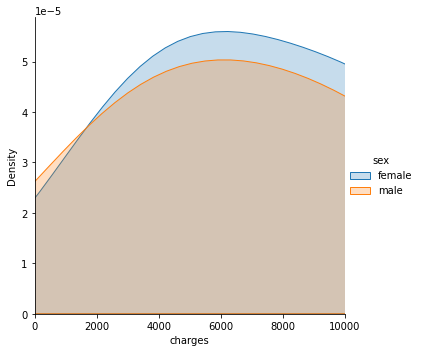

In [528]:
(sns
 .FacetGrid(df,
              hue = "sex",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

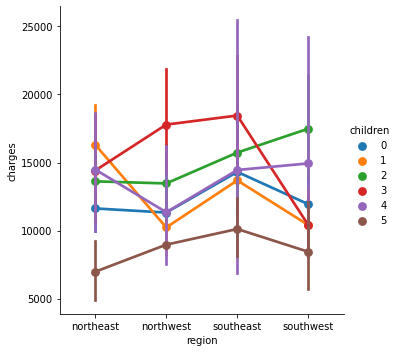

In [529]:
sns.catplot(x = "region", y = "charges", hue = "children", kind = "point", data = df);

Which region has more expenditure?

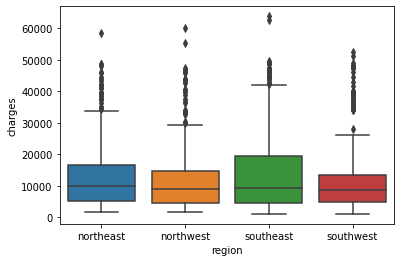

In [530]:
sns.boxplot(x = "region", y = "charges", data = df);

southeast

Which gender has more expenditure?

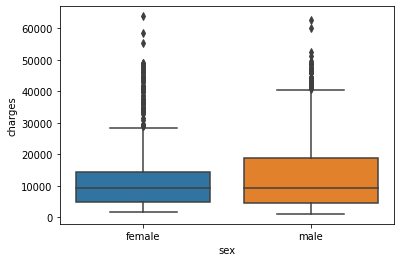

In [531]:
sns.boxplot(x = "sex", y = "charges", data = df);

male

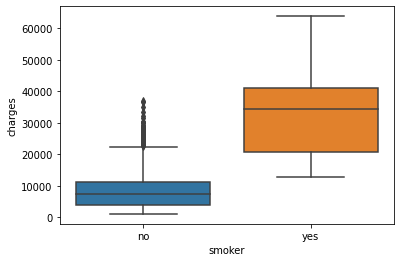

In [532]:
sns.boxplot(x = "smoker", y = "charges", data = df);

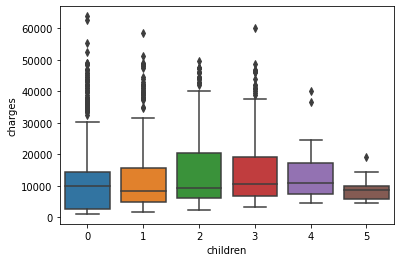

In [533]:
sns.boxplot(x = "children", y = "charges", data = df);

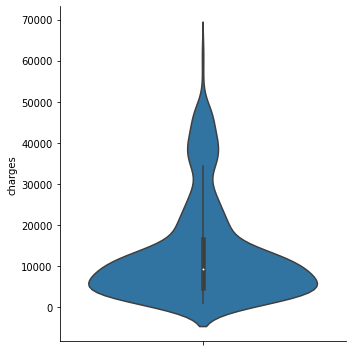

In [534]:
sns.catplot(y = "charges", kind = "violin", data = df);

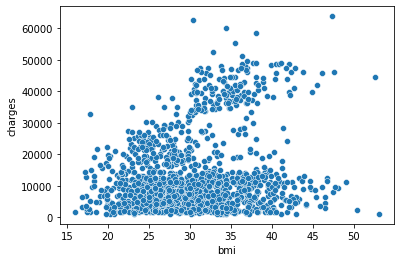

In [535]:
sns.scatterplot(x = "bmi", y = "charges", data = df);

It's not a linear graph. However, I can see that the charges variable increases as the bmi value increases.

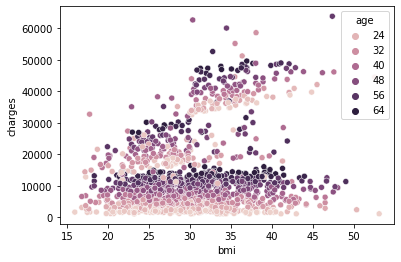

In [536]:
sns.scatterplot(x = "bmi", y = "charges", hue = "age",data = df);

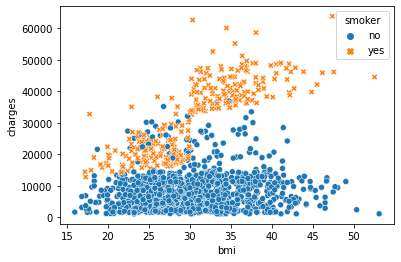

In [537]:
sns.scatterplot(x = "bmi", y = "charges", hue = "smoker", style = "smoker", data = df);

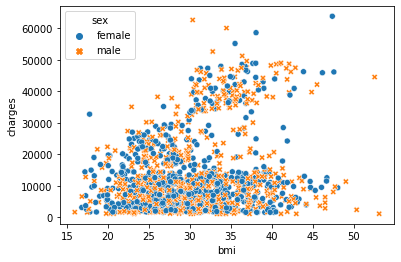

In [538]:
sns.scatterplot(x = "bmi", y = "charges", hue = "sex", style = "sex", data = df);

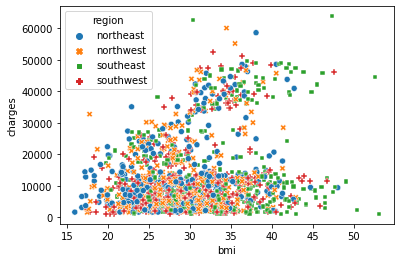

In [539]:
sns.scatterplot(x = "bmi", y = "charges", hue = "region", style = "region", data = df);

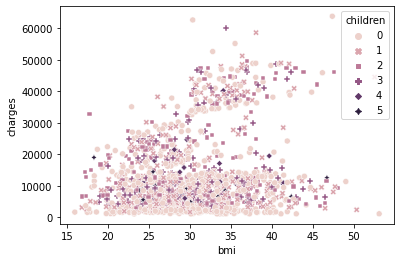

In [540]:
sns.scatterplot(x = "bmi", y = "charges", hue = "children", style = "children", data = df);

**Showing the Linear Relationship**

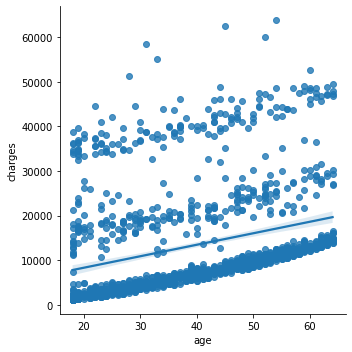

In [541]:
sns.lmplot(x = "age", y = "charges", data = df);

There is no linear relationship between them

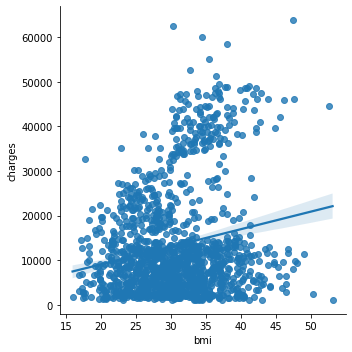

In [542]:
sns.lmplot(x = "bmi", y = "charges", data = df);

There is no linear relationship between them

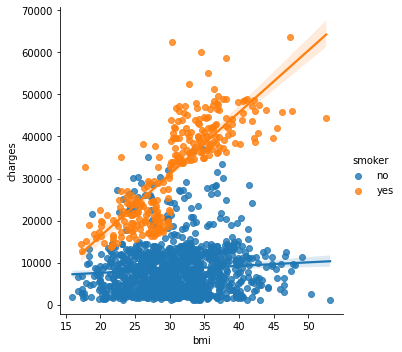

In [543]:
sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = df);

As the smoker and bmi variables increase, the charges variable also increases considerably.

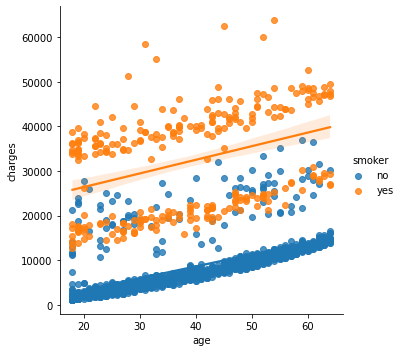

In [544]:
sns.lmplot(x = "age", y = "charges", hue = "smoker", data = df);

As the smoker and age variables increase, the charges variable also increases.

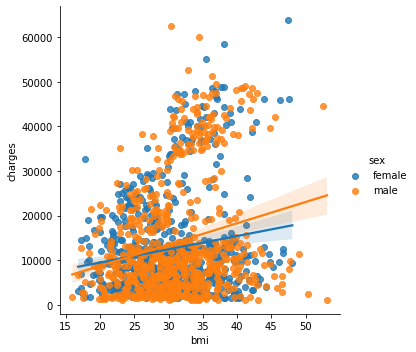

In [545]:
sns.lmplot(x = "bmi", y = "charges", hue = "sex", data = df);

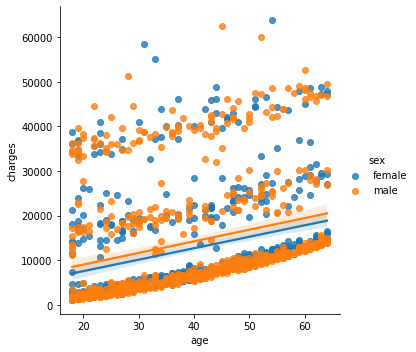

In [546]:
sns.lmplot(x = "age", y = "charges", hue = "sex", data = df);

In general, there is no linear relationship between the variables. This may be due to the skewness of the distribution within the variables themselves.

**Scatterplot Matrix**

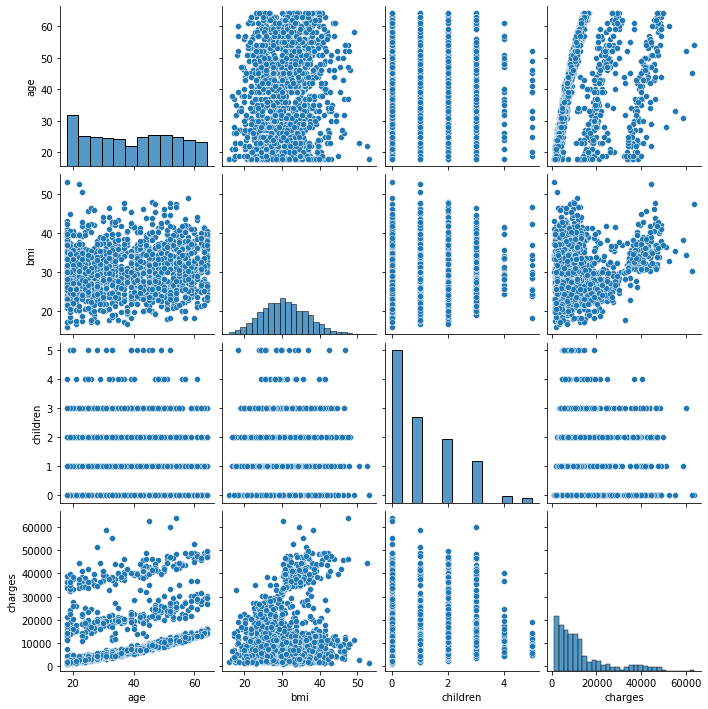

In [547]:
sns.pairplot(df);

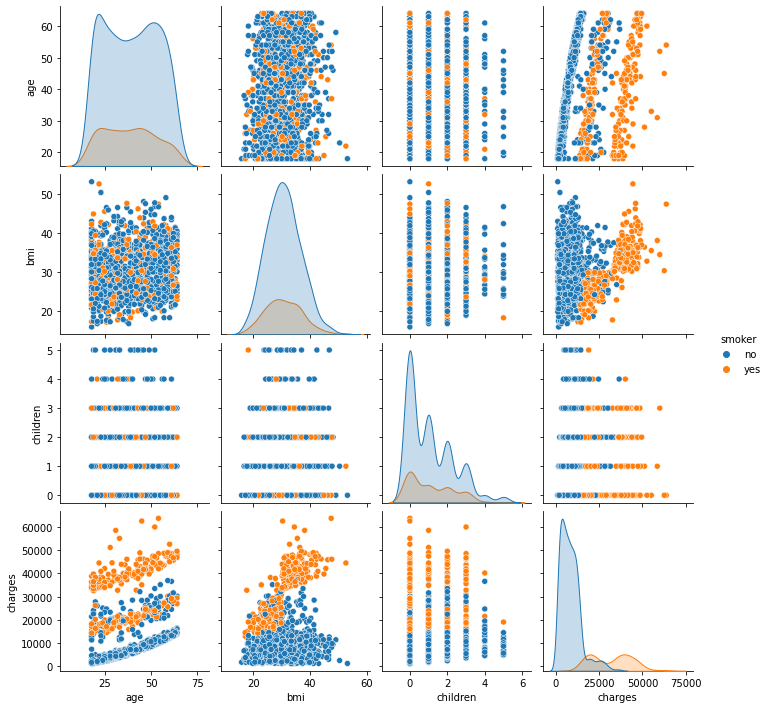

In [548]:
sns.pairplot(df, hue = "smoker");

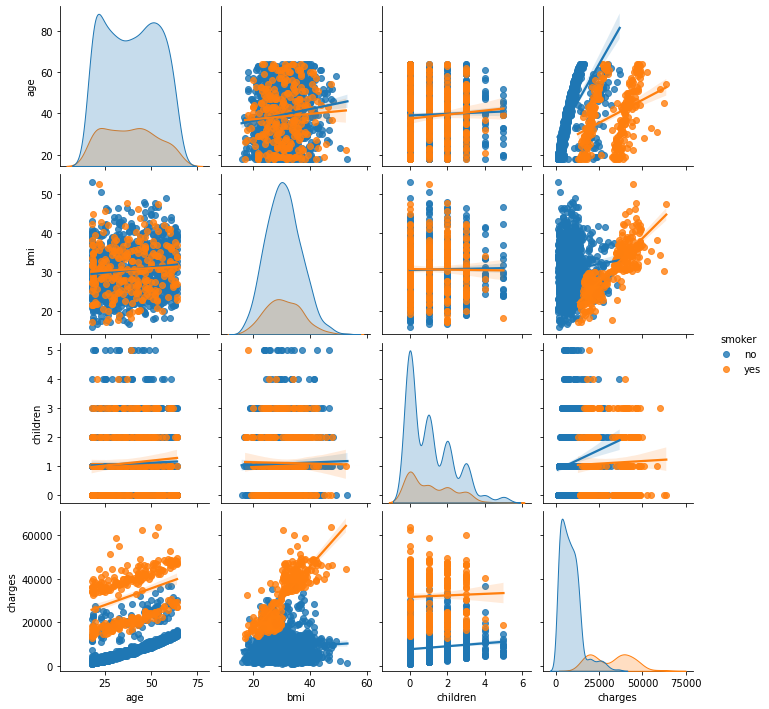

In [549]:
sns.pairplot(df, kind = "reg", hue = "smoker");

**Heatmap**

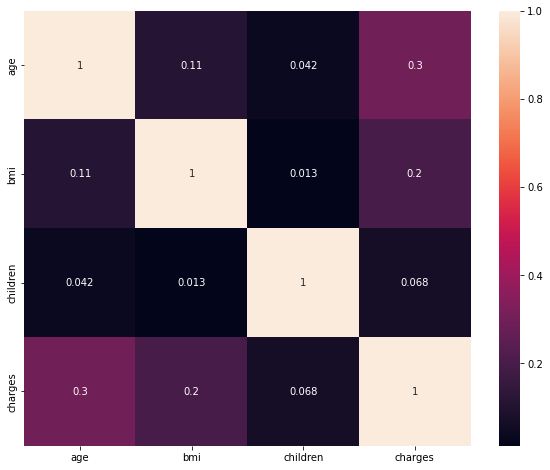

In [550]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, data=df)

There is no high correlation between numerical variables

# **Statisticts**

In [551]:
rp.summary_cont(df[["bmi","charges","age"]]) 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,bmi,1338.0,30.6634,6.0982,0.1667,30.3363,30.9904
1,charges,1338.0,13270.4223,12110.0112,331.0675,12620.9540,13919.8905
2,age,1338.0,39.2070,14.0500,0.3841,38.4535,39.9605


In [552]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [553]:
rp.summary_cat(df[["sex","children","region","smoker"]])

,Variable,Outcome,Count,Percent
0,sex,male,676,50.52
1,,female,662,49.48
2,children,0,574,42.90
3,,1,324,24.22
4,,2,240,17.94
5,,3,157,11.73
6,,4,25,1.87
7,,5,18,1.35
8,region,southeast,364,27.20
9,,northwest,325,24.29


In [554]:
df[["bmi","charges"]].cov() #covariance information = variability in relation to variables

,bmi,charges
bmi,37.187884,1.464730e+04
charges,14647.304426,1.466524e+08


In [555]:
df[["age","charges"]].cov()

,age,charges
age,197.401387,5.087480e+04
charges,50874.802298,1.466524e+08


In [556]:
charges = df["charges"]

In [557]:
sms.DescrStatsW(charges).tconfint_mean() #t.confint_mean = reveals the confidence interval.

(12620.954034192646, 13919.89049608987)

The 12620.95 to 12620.95 range has a 95% probability to cover the average amount customers expenditure


In [558]:
bmi = df["bmi"]

In [559]:
sms.DescrStatsW(bmi).tconfint_mean() 

(30.336346903054107, 30.99044681891899)

The 30.33 to 30.99 range is 95% likely to cover the average BMI of customers

In [560]:
age = df["age"]

In [561]:
sms.DescrStatsW(age).tconfint_mean() 

(38.453516373452935, 39.96053444866964)

# **Transformation**

I want to remember the graphs of the variables

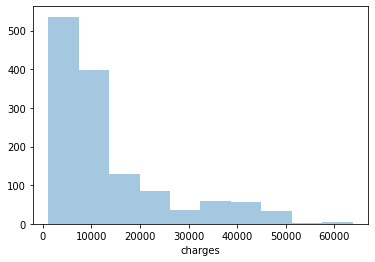

In [562]:
sns.distplot(df.charges, bins = 10, kde = False);

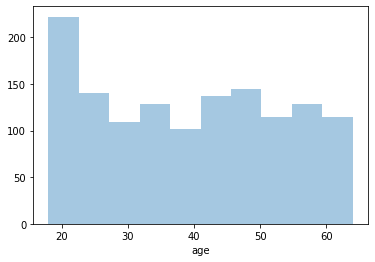

In [563]:
sns.distplot(df.age, bins = 10, kde = False);

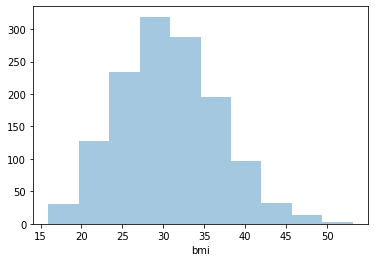

In [564]:
sns.distplot(df.bmi, bins = 10, kde = False);

In [565]:
charges_sqrt = np.sqrt(charges)

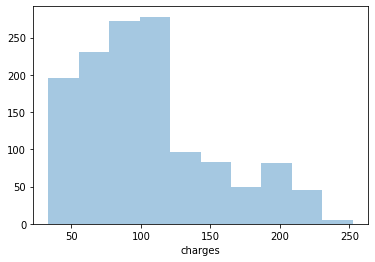

In [566]:
sns.distplot(charges_sqrt, bins = 10, kde = False);

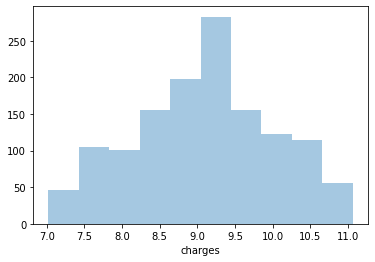

In [567]:
charges_log = np.log(charges)
sns.distplot(charges_log, bins = 10, kde = False);

charges variable converged to normal with log transform

In [568]:
df["charges_log"] = np.log(charges)

In [569]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


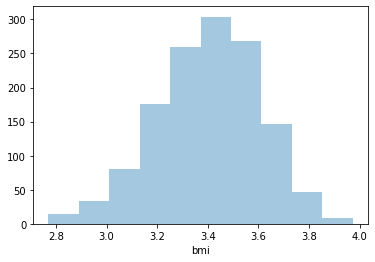

In [570]:
bmi_log = np.log(bmi)
sns.distplot(bmi_log, bins = 10, kde = False);

BMI variable converged to normal with log transform

In [571]:
df["bmi_log"] = np.log(bmi)

In [572]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log,bmi_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,3.328627
1,18,male,33.770,1,no,southeast,1725.55230,7.453302,3.519573
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,3.496508
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,3.122585
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,3.363149


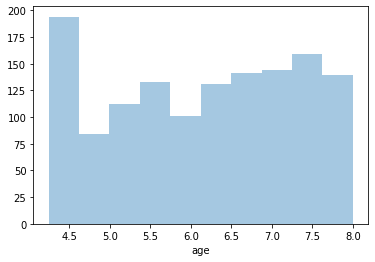

In [573]:
age_sqrt = np.sqrt(age)
sns.distplot(age_sqrt, bins = 10, kde = False);


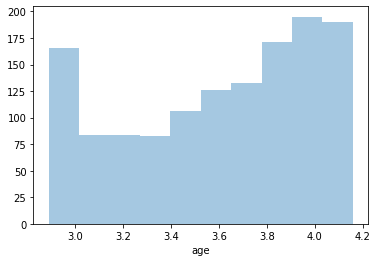

In [574]:
age_log = np.log(age)
sns.distplot(age_log, bins = 10, kde = False);

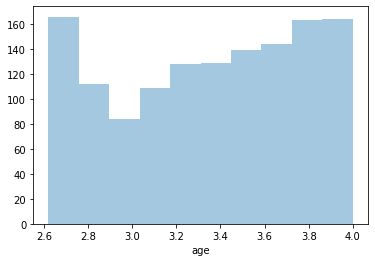

In [575]:
age_cbrt = np.cbrt(age)
sns.distplot(age_cbrt, bins = 10, kde = False);

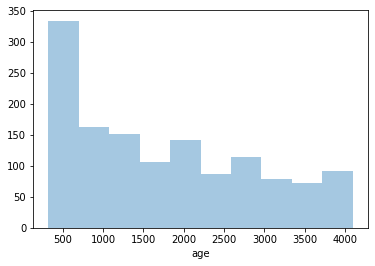

In [576]:
age_square = np.square(age)
sns.distplot(age_square, bins = 10, kde = False);

No suitable conversion was found for the age variable. 

In [773]:
df = expenses.copy()

In [775]:
df["bmi_log"] = np.log(bmi)
df["charges_log"] = np.log(charges)




**One hot encoding**

In [577]:
df_one_hot = df.copy()

In [578]:
pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

,age,bmi,children,smoker,region,charges,charges_log,bmi_log,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,9.734176,3.328627,1,0
1,18,33.770,1,no,southeast,1725.55230,7.453302,3.519573,0,1
2,28,33.000,3,no,southeast,4449.46200,8.400538,3.496508,0,1
3,33,22.705,0,no,northwest,21984.47061,9.998092,3.122585,0,1
4,32,28.880,0,no,northwest,3866.85520,8.260197,3.363149,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,9.268661,3.433019,0,1
1334,18,31.920,0,no,northeast,2205.98080,7.698927,3.463233,1,0
1335,18,36.850,0,no,southeast,1629.83350,7.396233,3.606856,1,0
1336,21,25.800,0,no,southwest,2007.94500,7.604867,3.250374,1,0


In [579]:
pd.get_dummies(df, columns = ["smoker"], prefix = ["smoker"])

,age,sex,bmi,children,region,charges,charges_log,bmi_log,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,9.734176,3.328627,0,1
1,18,male,33.770,1,southeast,1725.55230,7.453302,3.519573,1,0
2,28,male,33.000,3,southeast,4449.46200,8.400538,3.496508,1,0
3,33,male,22.705,0,northwest,21984.47061,9.998092,3.122585,1,0
4,32,male,28.880,0,northwest,3866.85520,8.260197,3.363149,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,9.268661,3.433019,1,0
1334,18,female,31.920,0,northeast,2205.98080,7.698927,3.463233,1,0
1335,18,female,36.850,0,southeast,1629.83350,7.396233,3.606856,1,0
1336,21,female,25.800,0,southwest,2007.94500,7.604867,3.250374,1,0


In [580]:
pd.get_dummies(df, columns = ["region"], prefix = ["region"]).head()

,age,sex,bmi,children,smoker,charges,charges_log,bmi_log,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,9.734176,3.328627,0,0,0,1
1,18,male,33.770,1,no,1725.55230,7.453302,3.519573,0,0,1,0
2,28,male,33.000,3,no,4449.46200,8.400538,3.496508,0,0,1,0
3,33,male,22.705,0,no,21984.47061,9.998092,3.122585,0,1,0,0
4,32,male,28.880,0,no,3866.85520,8.260197,3.363149,0,1,0,0


In [776]:
df = pd.get_dummies(df)

In [777]:
df.head()

,age,bmi,children,charges,bmi_log,charges_log,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.328627,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,3.519573,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,3.496508,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,3.122585,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,3.363149,8.260197,0,1,1,0,0,1,0,0


# **Modelling**

## **simple linear regression**

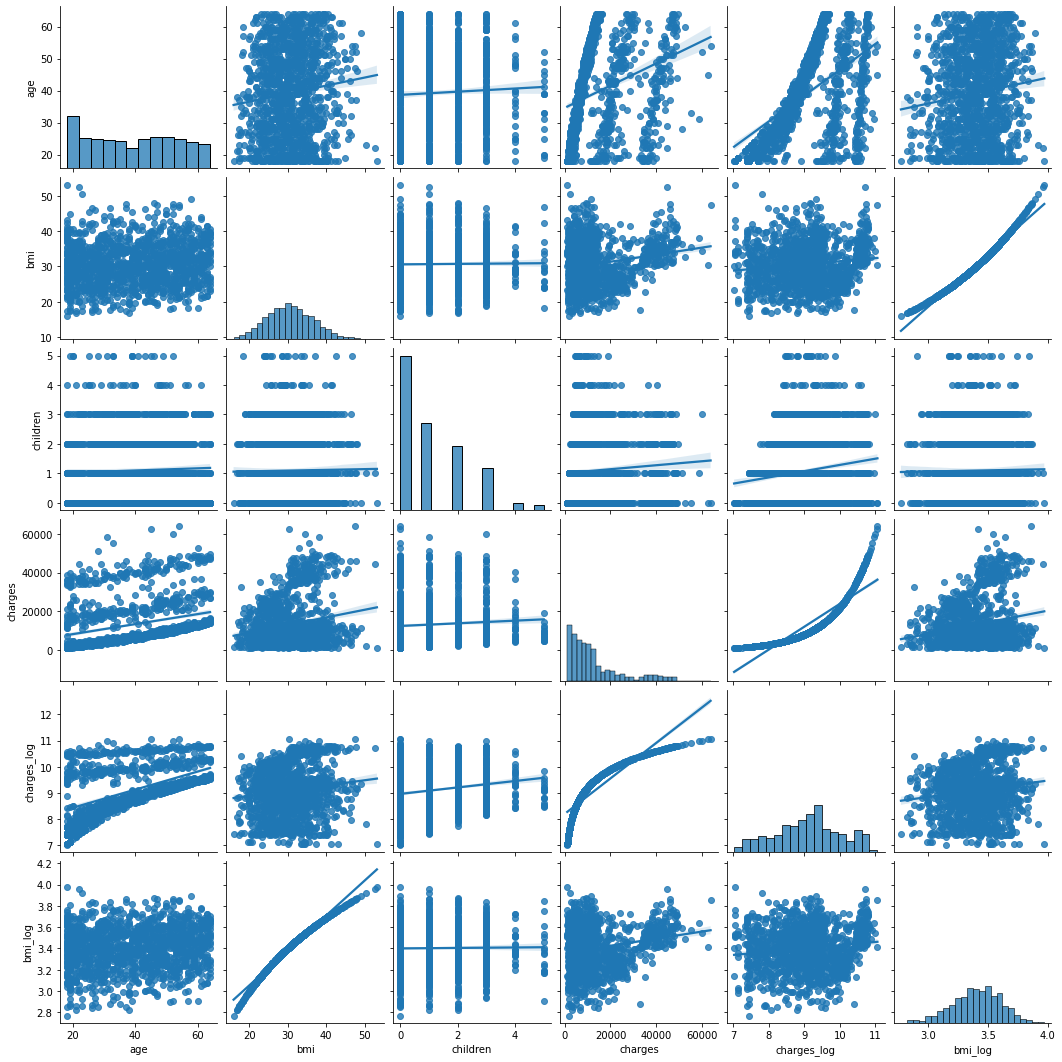

In [581]:
sns.pairplot(df, kind  ="reg");

**modeling with statsmodels**

In [778]:
X = df[["bmi_log"]]
X[0:5]

,bmi_log
0,3.328627
1,3.519573
2,3.496508
3,3.122585
4,3.363149


In [779]:
X = sm.add_constant(X)

In [780]:
X[0:5]

,const,bmi_log
0,1.0,3.328627
1,1.0,3.519573
2,1.0,3.496508
3,1.0,3.122585
4,1.0,3.363149


In [781]:
y = df["charges_log"]
y[0:5]

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges_log, dtype: float64

In [782]:
lm = sm.OLS(y,X)

In [783]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     25.91
Date:                Thu, 21 Jul 2022   Prob (F-statistic):           4.09e-07
Time:                        14:08:31   Log-Likelihood:                -1772.9
No. Observations:                1338   AIC:                             3550.
Df Residuals:                    1336   BIC:                             3560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9673      0.419     16.610      0.000       6.144       7.790
bmi_log        0.6263      0.123      5.090      0.000       0.385       0.868
==============================================================================
Omnibus:                       68.134   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.201
Skew:                          -0.153   Prob(JB):                     1.68e-07
Kurtosis:                       2.318   Cond. No.                         62.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When I look at the R^2 value, I can't say that the model is very meaningful. The coefficients of the variables are significant since they are between the confidence intervals. 
When I look at the constant coefficient, the average variation I would expect in the charges variable is 6.9673, unless there is a variation in the bmi variable. When there is a one-unit increase in the bmi variable, there will be an increase of 0.6263 in the charges variable.

In [784]:
model. mse_model #Mean squared error

21.50505559226758

In [785]:
charges.mean()

13270.422265141257

In [786]:
model.rsquared_adj

0.018288782940442894

The adjusted R^2 value is not very significant.

In [787]:
model.fittedvalues[0:5] #Estimated y values

0    9.052111
1    9.171705
2    9.157258
3    8.923063
4    9.073733
dtype: float64

In [789]:
y[0:5] #real y values

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges_log, dtype: float64

In [790]:
print("Charges = " +  str("%.2f" % model.params[0]) + " + bmi" + "*" + str("%.2f" % model.params[1])) #model equation

Charges = 6.97 + bmi*0.63


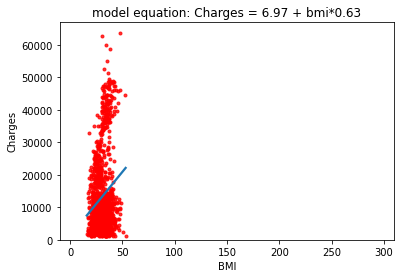

In [791]:
g = sns.regplot(df["bmi"], df["charges"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("model equation: Charges = 6.97 + bmi*0.63")
g.set_ylabel("Charges")
g.set_xlabel("BMI")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [792]:
X = df[["bmi_log"]]
y = df["charges_log"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([0.62632112])

In [793]:
model.score(X,y) #R^2 value

0.019023047126725423

In [794]:
lm = smf.ols("charges_log ~ bmi_log", df)
model = lm.fit()

The mean of the squares of the difference between the actual values and the estimated values:

In [795]:
mse = mean_squared_error(y, model.fittedvalues)

In [796]:
mse

0.8288256377952996

In [797]:
rmse = np.sqrt(mse)

In [798]:
reg.predict(X)[0:10]

array([9.05211111, 9.17170472, 9.15725845, 8.92306295, 9.07373336,
       9.00164185, 9.16555421, 9.04850897, 9.09400442, 9.0040704 ])

In [799]:
y[0:10]

0     9.734176
1     7.453302
2     8.400538
3     9.998092
4     8.260197
5     8.231275
6     9.016827
7     8.893093
8     8.765054
9    10.272397
Name: charges_log, dtype: float64

In [800]:
k_t = pd.DataFrame({"real_y": y[0:10],
                   "pred_y": reg.predict(X)[0:10]})

In [801]:
k_t

,real_y,pred_y
0,9.734176,9.052111
1,7.453302,9.171705
2,8.400538,9.157258
3,9.998092,8.923063
4,8.260197,9.073733
5,8.231275,9.001642
6,9.016827,9.165554
7,8.893093,9.048509
8,8.765054,9.094004
9,10.272397,9.004070


In [802]:
k_t["error"] = k_t["real_y"] - k_t["pred_y"]

In [803]:
k_t

,real_y,pred_y,error
0,9.734176,9.052111,0.682065
1,7.453302,9.171705,-1.718402
2,8.400538,9.157258,-0.756720
3,9.998092,8.923063,1.075029
4,8.260197,9.073733,-0.813537
5,8.231275,9.001642,-0.770367
6,9.016827,9.165554,-0.148727
7,8.893093,9.048509,-0.155416
8,8.765054,9.094004,-0.328950
9,10.272397,9.004070,1.268327


In [804]:
k_t["error_square"] = k_t["error"]**2

In [805]:
k_t

,real_y,pred_y,error,error_square
0,9.734176,9.052111,0.682065,0.465213
1,7.453302,9.171705,-1.718402,2.952906
2,8.400538,9.157258,-0.756720,0.572625
3,9.998092,8.923063,1.075029,1.155687
4,8.260197,9.073733,-0.813537,0.661842
5,8.231275,9.001642,-0.770367,0.593465
6,9.016827,9.165554,-0.148727,0.022120
7,8.893093,9.048509,-0.155416,0.024154
8,8.765054,9.094004,-0.328950,0.108208
9,10.272397,9.004070,1.268327,1.608653


In [806]:
np.sum(k_t["error_square"]) #error sum of squares

8.164872102991618

In [807]:
np.mean(k_t["error_square"]) #error mean squares

0.8164872102991618

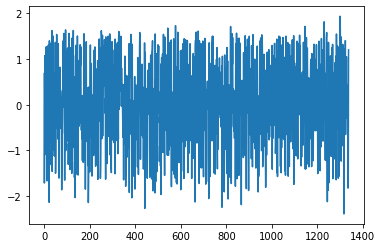

In [808]:
plt.plot(model.resid)

## **Multiple Linear Regression**

**separating dataset into test and train - 20% test , 80% train**

In [809]:
X = df.drop("charges_log", axis = 1)
y = df["charges_log"]
X.drop(["charges","bmi"],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [810]:
X.head()

,age,children,bmi_log,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,3.328627,1,0,0,1,0,0,0,1
1,18,1,3.519573,0,1,1,0,0,0,1,0
2,28,3,3.496508,0,1,1,0,0,0,1,0
3,33,0,3.122585,0,1,1,0,0,1,0,0
4,32,0,3.363149,0,1,1,0,0,1,0,0


In [811]:
X_train.shape

(1070, 11)

In [812]:
y_train.shape

(1070,)

In [813]:
X_test.shape

(268, 11)

In [814]:
y_test.shape

(268,)

In [815]:
training = df.copy()

In [816]:
training.shape

(1338, 14)

**Statsmodels**

In [817]:
lm = sm.OLS(y_train, X_train)

In [818]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            charges_log   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     415.4
Date:                Thu, 21 Jul 2022   Prob (F-statistic):          1.44e-320
Time:                        14:09:49   Log-Likelihood:                -659.67
No. Observations:                1070   AIC:                             1337.
Df Residuals:                    1061   BIC:                             1382.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0342      0.001     34.481      0.000       0.032       0.036
children             0.0924      0.011      8.142      0.000       0.070       0.115
bmi_log              0.4281      0.071      5.993      0.000       0.288       0.568
sex_female           2.7051      0.097     27.794      0.000       2.514       2.896
sex_male             2.6309      0.098     26.921      0.000       2.439       2.823
smoker_no            1.8919      0.098     19.372      0.000       1.700       2.084
smoker_yes           3.4441      0.098     34.986      0.000       3.251       3.637
region_northeast     1.4144      0.051     27.993      0.000       1.315       1.514
region_northwest     1.3551      0.052     26.068      0.000       1.253       1.457
region_southeast     1.2768      0.059     21.739      0.000       1.162       1.392
region_southwest     1.2898      0.054     23.746      0.000       1.183       1.396
==============================================================================
Omnibus:                      354.558   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1170.621
Skew:                           1.621   Prob(JB):                    6.35e-255
Kurtosis:                       6.968   Cond. No.                     3.52e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

When I look at the R^2 value, I can say that the model is meaningful. The coefficients of the variables are within the confidence intervals, the variables are significant for the model. Multiple linear regression models will be suitable for this data.

In [819]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
age,0.0342,0.001,34.481,0.000,0.032,0.036
children,0.0924,0.011,8.142,0.000,0.070,0.115
bmi_log,0.4281,0.071,5.993,0.000,0.288,0.568
sex_female,2.7051,0.097,27.794,0.000,2.514,2.896
sex_male,2.6309,0.098,26.921,0.000,2.439,2.823
smoker_no,1.8919,0.098,19.372,0.000,1.700,2.084
smoker_yes,3.4441,0.098,34.986,0.000,3.251,3.637
region_northeast,1.4144,0.051,27.993,0.000,1.315,1.514
region_northwest,1.3551,0.052,26.068,0.000,1.253,1.457
region_southeast,1.2768,0.059,21.739,0.000,1.162,1.392


**sckit-learn model**

In [820]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [821]:
model.intercept_ #constant coefficient

6.670031530579166

In [822]:
model.coef_  #Coefficient of all independent variables

array([ 0.03415694,  0.09244138,  0.42808602,  0.03708205, -0.03708205,
       -0.77610916,  0.77610916,  0.08041085,  0.02105592, -0.05724713,
       -0.04421964])

**Model Tuning**

In [823]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

0.4482419595477562

In [824]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

0.41876960194670254

In [825]:
model.score(X_train, y_train)

0.7579962807303082

In [826]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.7513851361275642

In [827]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean() 

0.44952670306720127

In [828]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

0.42019584076591787

**PCR model - Principal Component Regression**

In [832]:
pca = PCA()

In [833]:
X_reduced_train = pca.fit_transform(scale(X_train)) #reduced X


In [834]:
X_reduced_train[0:1,:]

array([[-1.58447813e+00,  3.05564520e-01, -1.59113027e+00,
         9.55406115e-02,  2.05870474e+00,  2.30733159e-01,
         6.12743646e-01,  1.35992071e+00,  4.71243948e-15,
         9.55914751e-17, -4.47987929e-17]])

In [835]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5] #explained variance

array([19.56, 36.58, 50.43, 62.5 , 74.51])

It is seen that the first component explains 20% of the total variance in the data set. The variance explained by the second component together with the first component explains 37%. Here we can represent it with 5 components.

In [836]:
lm = LinearRegression()

In [837]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [838]:
pcr_model.intercept_

9.113322337921884

In [839]:
pcr_model.coef_

array([ 2.79917001e-01,  2.87918462e-01,  2.67787633e-02,  7.97576417e-02,
        4.88154980e-02,  4.74823150e-01, -1.94395451e-01,  1.29267064e-01,
       -1.39944300e-29, -1.17441590e-27,  2.75809924e-28])

**Prediction**

In [840]:
y_pred = pcr_model.predict(X_reduced_train)

In [841]:
y_pred[0:5]

array([8.98952175, 8.98294183, 9.02546973, 9.18168057, 9.3866519 ])

In [842]:
np.sqrt(mean_squared_error(y_train, y_pred))

0.44824195954775614

In [845]:
df["charges_log"].mean()

9.098658729424766

In [846]:
r2_score(y_train, y_pred)

0.7579962807303082

In [847]:
pca2 = PCA()

In [848]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [849]:
y_pred = pcr_model.predict(X_reduced_test)

In [850]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.4951317434590537

**Model Tuning**

In [851]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.49513174345905353


I will be optimizing the mean square error with Model Tuning.

In [854]:
cv_10 = model_selection.KFold(n_splits = 10, 
                             shuffle = True,
                             random_state = 1)

In [855]:
lm = LinearRegression()

In [856]:
RMSE = []

In [857]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

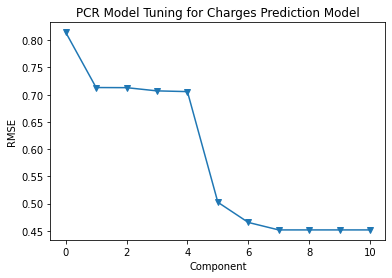

In [859]:
plt.plot(RMSE, '-v')
plt.xlabel('Component')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Charges Prediction Model');

We determined the optimum number of components using the cross validation method and the train dataset. (7)

In [860]:
pcr_model = lm.fit(X_reduced_train[:,0:7], y_train)

In [861]:
y_pred = pcr_model.predict(X_reduced_train[:,0:7])

In [862]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

0.46233853311312945


In [864]:
y_pred = pcr_model.predict(X_reduced_test[:,0:7])

In [865]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.4909324882266859


**Ridge Regresyon**

In [867]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [869]:
ridge_model.coef_

array([ 0.03415833,  0.09243735,  0.42697458,  0.03705766, -0.03705766,
       -0.77588074,  0.77588074,  0.0803269 ,  0.02099983, -0.05712033,
       -0.0442064 ])

In [870]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

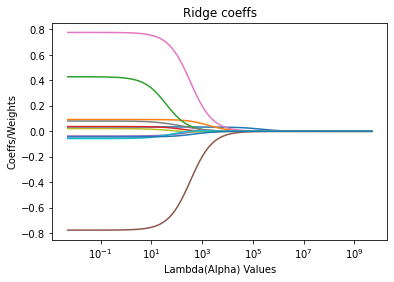

In [872]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
coeffs = []

for i in lambdas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    coeffs.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdas, coeffs) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coeffs/Weights')
plt.title('Ridge coeffs');

**Prediction**

In [874]:
y_pred = ridge_model.predict(X_test)

In [875]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.41876962825744407

**Model Tuning**

In [876]:
lambdas = 10**np.linspace(10,-2,100)*0.5 

In [878]:
lambdas[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [879]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdas, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [880]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [881]:
ridge_cv.alpha_

0.005

In [883]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train,y_train)

In [884]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

0.41902400519622457

**Lasso Regression**

In [886]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [887]:
lasso_model.coef_

array([ 3.38268544e-02,  2.77543675e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -9.32777737e-01,  1.62626894e-16,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [ ]:
lasso = Lasso()
lambdas = 10**np.linspace(10,-2,100)*0.5 
coeffs = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coeffs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coeffs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

**Prediction**

In [889]:
lasso_model.predict(X_test)

array([ 9.13719231,  8.77724188, 10.65717154,  9.19877353,  9.13496309,
        8.73734254,  8.20218536,  9.7243938 ,  8.50662705,  9.30025409,
        9.59032159,  9.00188489,  8.56820827, 10.13155126, 10.52186412,
       10.13762375,  9.27249972, 10.10986938,  9.14326479,  9.9468076 ,
        8.54391832,  9.0695386 ,  8.20218536,  8.30366592,  9.33408095,
        9.38612526,  9.58908639,  8.55606329,  9.20484601,  8.1683585 ,
        9.02356677,  9.48760582,  8.26983907,  8.65754386,  8.4667277 ,
        9.08168357,  8.29759343,  9.04178423, 10.27900366,  9.73777399,
        8.34095719,  8.33142029,  9.48153334,  9.55525953,  8.73127005,
        9.5830139 ,  8.3253478 ,  8.48840959, 10.0300707 ,  8.66361634,
        9.69056695,  8.19611287,  8.94030367,  8.1683585 ,  9.45377897,
        9.30632658,  8.57428075,  9.62414845,  9.52143268,  9.35229841,
        9.69056695,  8.62978949,  9.70617634,  9.03571174,  9.31847155,
        8.53438141,  9.31363427,  9.40173465,  8.43290085,  8.30

In [890]:
y_pred = lasso_model.predict(X_test)

In [891]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.5109569776360443

**Model Tuning**

In [893]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [899]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [900]:
lasso_cv_model.alpha_

1.8346331580282213e-05

In [901]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [903]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=1.8346331580282213e-05)

In [904]:
y_pred = lasso_tuned.predict(X_test)

In [905]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.4187751571580361

In [921]:
r2_score(y_test, y_pred)

0.7991121439664749

**ElasticNet Regresyonu**

In [907]:
enet_model = ElasticNet().fit(X_train, y_train)

In [908]:
enet_model.coef_

array([ 0.03048062,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ])

In [909]:
enet_model.intercept_

7.913696149989658

**prediction**

In [910]:
enet_model.predict(X_test)

array([9.28532421, 9.0109986 , 9.86445606, 9.31580484, 8.492828  ,
       8.95003735, 8.492828  , 9.86445606, 8.76715361, 9.40724671,
       8.82811486, 9.16340172, 8.79763423, 9.31580484, 9.74253357,
       9.34628546, 9.40724671, 9.34628546, 9.31580484, 9.22436296,
       8.67571174, 9.22436296, 8.492828  , 8.58426987, 9.43772733,
       9.55964982, 9.74253357, 8.73667299, 9.34628546, 8.46234737,
       9.13292109, 9.6510917 , 8.55378925, 8.82811486, 8.70619236,
       9.28532421, 8.55378925, 9.22436296, 9.49868858, 9.0109986 ,
       8.492828  , 8.58426987, 9.62061107, 9.71205294, 8.91955673,
       9.71205294, 8.55378925, 8.67571174, 9.22436296, 8.85859548,
       9.83397544, 8.46234737, 9.13292109, 8.46234737, 9.62061107,
       9.43772733, 8.82811486, 8.85859548, 9.68157232, 9.5291692 ,
       9.83397544, 8.82811486, 9.77301419, 9.19388234, 9.49868858,
       8.76715361, 8.55378925, 9.49868858, 8.67571174, 8.58426987,
       9.07195985, 9.31580484, 9.37676608, 9.10244047, 9.25484

In [911]:
y_pred = enet_model.predict(X_test)

In [912]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.7774515680584173

In [913]:
r2_score(y_test, y_pred)

0.3277682067903702

**Model Tuning**

In [915]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [916]:
enet_cv_model.alpha_

0.013094177175393852

In [917]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [918]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [919]:
y_pred = enet_tuned.predict(X_test)

In [920]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.42500169434275464

Among these models, I can say that the lasso model with the lowest mse value is the most suitable model.